# create a grid of points

This grid will be used for a localization array. It has a 5x5 square grid with 50 meter spacing, plus an offset 4x4 grid on the centers of the 5x5 grid for a total of 41 points.

First, choose a location based on an existing point named RK1016

In [31]:
import utm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=[15,5] #for big visuals
%config InlineBackend.figure_format = 'retina'

In [32]:
rk1016 = [39.90960, -79.49520]

convert to utm, and choose location of SW corner to be 150 meters West and 50 meters South of the point RK1016

In [84]:
utm_E,utm_N,utm_zone,utm_letter = utm.from_latlon(rk1016[0],rk1016[1])
rk1016_utm = np.array([utm_E,utm_N])

#offset the grid compared to this point
sw_corner = rk1016_utm + [-150,-50]

#check the values of rk1016:
utm_E,utm_N,utm_zone,utm_letter

(628621.1475615095, 4418807.565860939, 17, 'S')

create 5x5 grid and 4x4 centers grid

In [85]:
bottom_row = np.array([sw_corner + [m,0] for m in np.arange(0,250,50)])
grid_a = np.array([bottom_row + [0,m] for m in np.arange(0,250,50)])

grid_b = grid_a[0:4,0:4]+[25,25]

combine the two sets of points and plot 

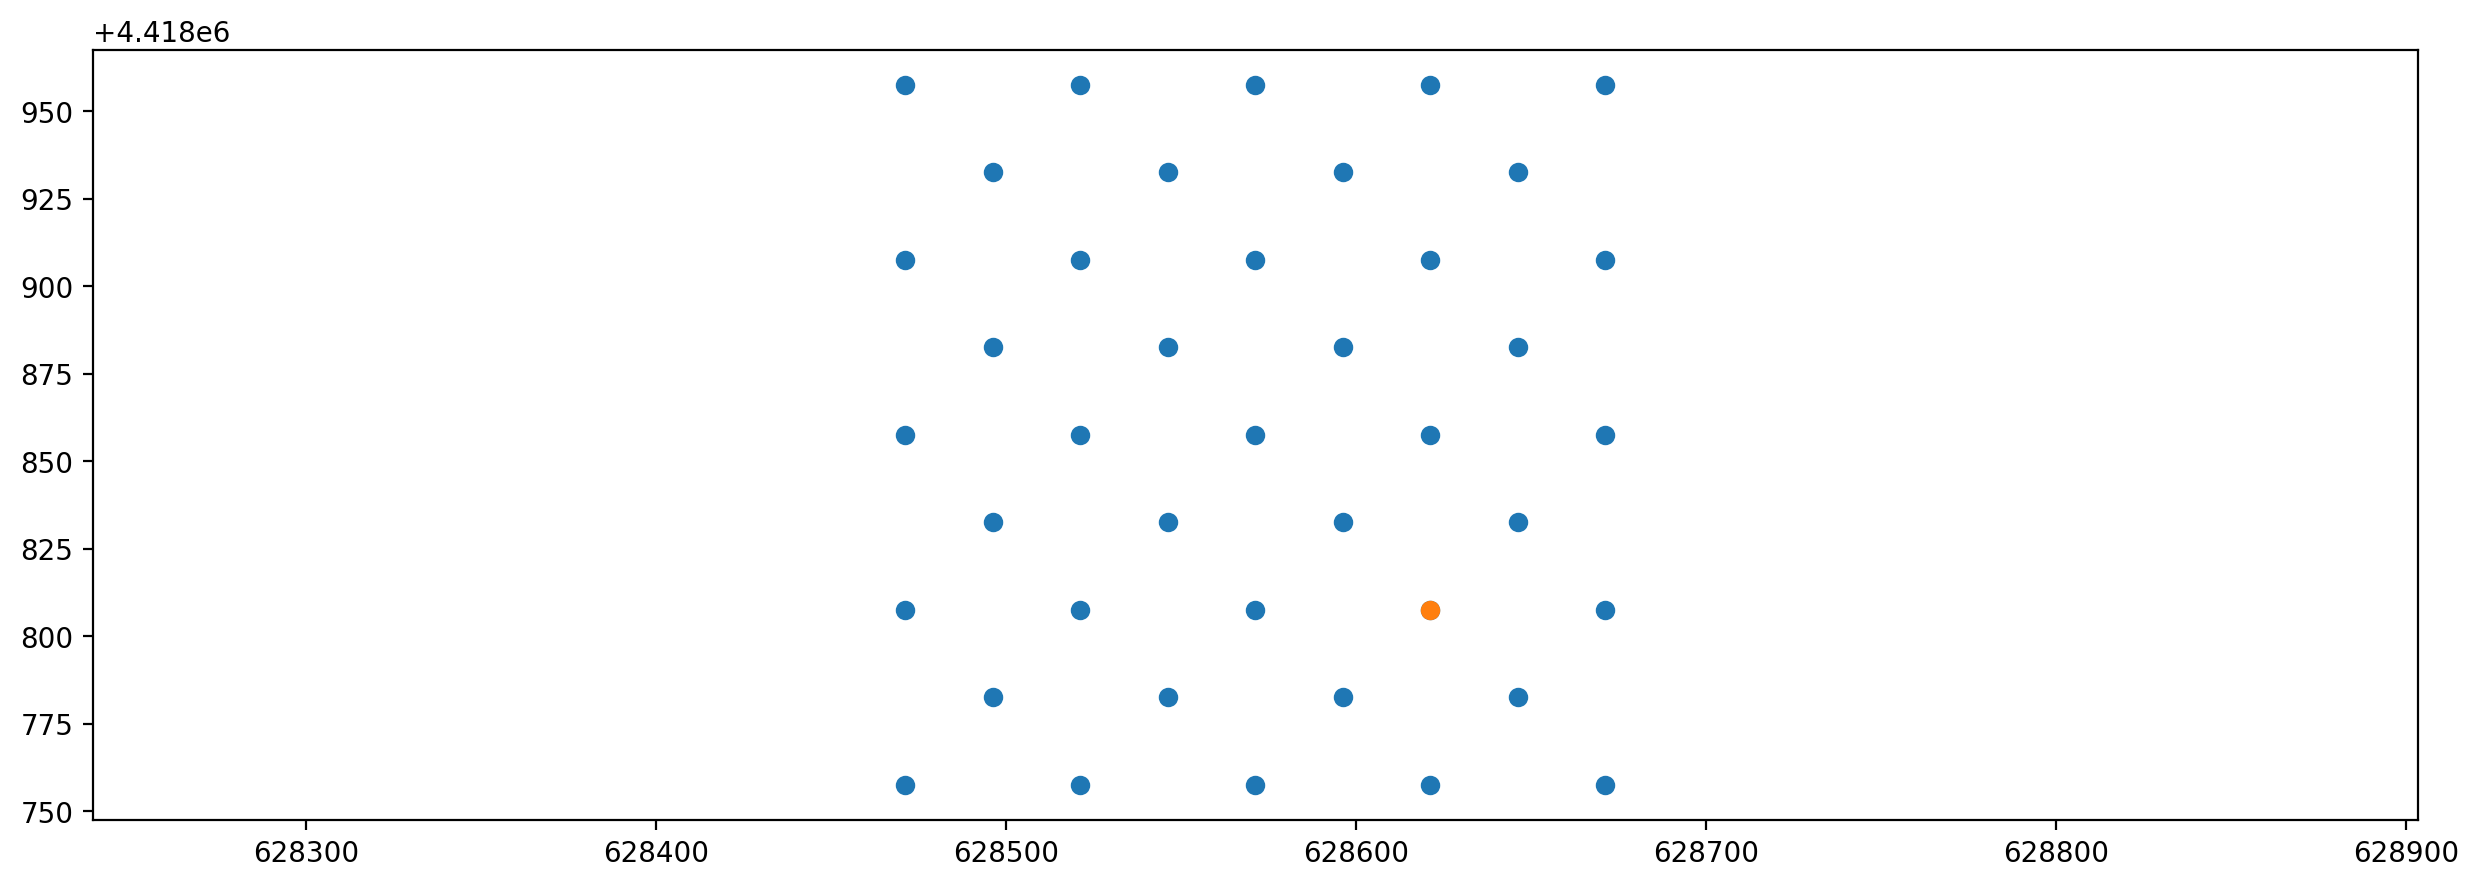

In [87]:
grid_a_points = grid_a.reshape([25,2])
grid_b_points = grid_b.reshape([16,2])

# plt.scatter(grid_a_points[:,0],grid_a_points[:,1])
# plt.scatter(grid_b_points[:,0],grid_b_points[:,1])

grid6 = np.concatenate([grid_a_points,grid_b_points])
plt.scatter(grid6[:,0],grid6[:,1])


plt.scatter(rk1016_utm[0],rk1016_utm[1])
plt.axis('equal')

pass

# create kml file

convert to lat/lon

In [72]:
grid6_latlon = np.array(utm.to_latlon(grid6[:,0],grid6[:,1],utm_zone,utm_letter)).transpose([1,0])

create table with names

In [78]:
grid6_df = pd.DataFrame(
    {
        'utm_E':grid6[:,0],
        'utm_N':grid6[:,1],
        'utm_zone':utm_zone,
        'utm_letter':utm_letter,
        'Latitude':grid6_latlon[:,0],
        'Longitude':grid6_latlon[:,1],
    }
)
grid6_df['name']=[f"grid6_{i+1:02n}" for i in range(len(grid6_df))]

create kml file

In [81]:
import simplekml

kml=simplekml.Kml()
for i, row in grid6_df.iterrows():
    #note that it expects lon, lat rather than lat, lon
    kml.newpoint(name=row['name'], 
                 coords=[(row['Longitude'],row['Latitude'])]
                )

# uncomment this line to save the kml file:
kml.save('loca2023_grid6.kml')